# GPR using `mini-gpr`

## A toy system

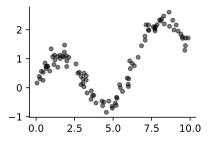

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from mini_gpr.tutorials import sample_toy_1d_system

x_train, y_train = sample_toy_1d_system()
plt.plot(x_train, y_train, "ok", alpha=0.5, ms=4);

## Model definition

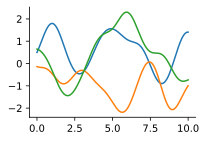

In [2]:
from mini_gpr.kernels import RBF
from mini_gpr.models import GPR

model = GPR(kernel=RBF(), noise=0.3)

xx = np.linspace(0, 10, 250)
plt.plot(xx, model.sample_prior(xx, n_samples=3, rng=42));

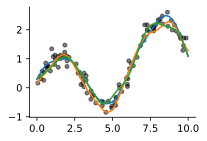

In [6]:
model.fit(x_train, y_train)

plt.plot(x_train, y_train, "ok", alpha=0.5, ms=4)
plt.plot(xx, model.sample_posterior(xx, n_samples=3, rng=42));

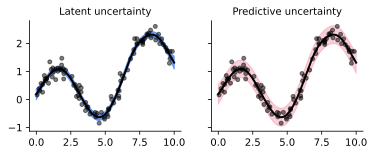

In [7]:
yy = model.predict(xx)
latent_std = model.latent_uncertainty(xx)
yy_std = model.predictive_uncertainty(xx)

_, (left, right) = plt.subplots(1, 2, figsize=(6, 2), sharey=True)

for ax in (left, right):
    ax.plot(x_train, y_train, "ok", alpha=0.5, ms=4)
    ax.plot(xx, yy, "k-", lw=2)

left.fill_between(xx, yy - latent_std, yy + latent_std, color="cornflowerblue")
left.set_title("Latent uncertainty", fontsize=10)

right.fill_between(xx, yy - yy_std, yy + yy_std, color="crimson", alpha=0.2)
right.set_title("Predictive uncertainty", fontsize=10);

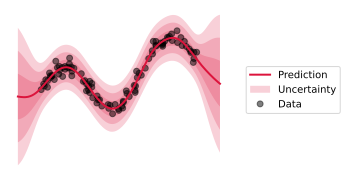

In [8]:
from mini_gpr.viz import show_model_predictions

show_model_predictions(model, x_train, y_train)